<a href="https://colab.research.google.com/github/mrsanap/AICS_LAB/blob/main/Ddos_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify DDos

In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:

#Read dataset
data = pd.read_csv('dataset_ddos.csv')

In [4]:

#check the dataset
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3.0,...,451.0,0.0,UDP,3.0,143928631.0,3917.0,0.0,0.0,0.0,0.0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2.0,...,451.0,0.0,UDP,4.0,3842.0,3520.0,0.0,0.0,0.0,0.0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3.0,...,451.0,0.0,UDP,1.0,3795.0,1242.0,0.0,0.0,0.0,0.0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3.0,...,451.0,0.0,UDP,2.0,3688.0,1492.0,0.0,0.0,0.0,0.0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3.0,...,451.0,0.0,UDP,3.0,3413.0,3665.0,0.0,0.0,0.0,0.0


In [5]:

#check the shape of the dataset
data.shape

(26057, 23)

In [6]:

#check the information of the data
data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26057 entries, 0 to 26056
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           26057 non-null  int64  
 1   switch       26057 non-null  int64  
 2   src          26057 non-null  object 
 3   dst          26057 non-null  object 
 4   pktcount     26057 non-null  int64  
 5   bytecount    26057 non-null  int64  
 6   dur          26057 non-null  int64  
 7   dur_nsec     26057 non-null  int64  
 8   tot_dur      26056 non-null  float64
 9   flows        26056 non-null  float64
 10  packetins    26056 non-null  float64
 11  pktperflow   26056 non-null  float64
 12  byteperflow  26056 non-null  float64
 13  pktrate      26056 non-null  float64
 14  Pairflow     26056 non-null  float64
 15  Protocol     26056 non-null  object 
 16  port_no      26056 non-null  float64
 17  tx_bytes     26056 non-null  float64
 18  rx_bytes     26056 non-null  float64
 19  tx_k

In [7]:
#we see that the label contains boolean value: 0-bening, 1-maliciuous
data.label.unique()

array([ 0.,  1., nan])

In [8]:
#count the total value of 0 and 1
data.label.value_counts()

1.0    13096
0.0    12960
Name: label, dtype: int64

In [9]:
#bar plot for 0 and 1 using dictionary
label_dict = dict(data.label.value_counts())
label_dict

{1.0: 13096, 0.0: 12960}

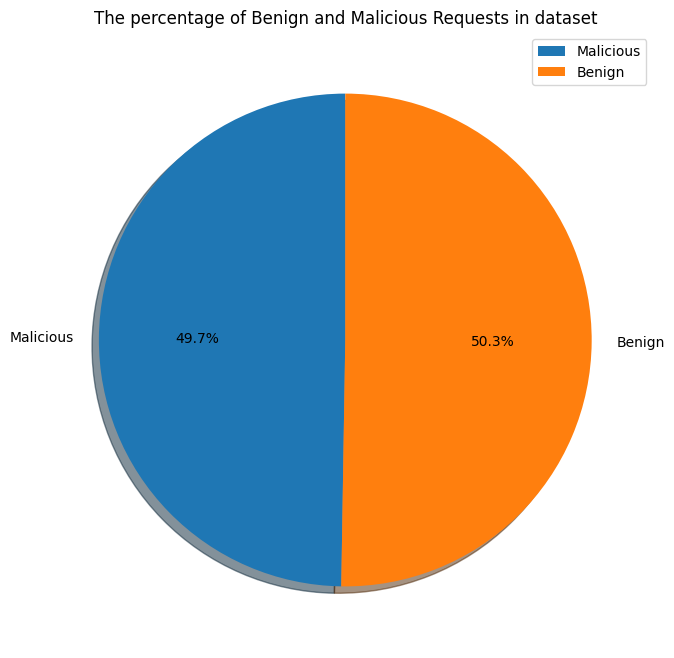

In [10]:
labels = ['Malicious', 'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(["Malicious", "Benign"])
plt.title('The percentage of Benign and Malicious Requests in dataset')
plt.show()

In [11]:
#use decribe function 
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,26057.000000,26057.000000,26057.000000,2.605700e+04,26057.000000,2.605700e+04,2.605600e+04,26056.000000,26056.000000,26056.000000,2.605600e+04,26056.000000,26056.0,26056.000000,2.605600e+04,2.605600e+04,26056.000000,25817.000000,25817.000000,26056.000000
mean,8897.108032,3.189738,72538.928042,7.661972e+07,194.414438,5.261768e+08,1.949093e+11,3.703869,2816.076758,10066.716073,1.065375e+07,335.116019,0.0,2.325107,5.885088e+07,5.886541e+07,998.638548,1009.254096,2017.137506,0.502610
std,3505.587089,1.253517,40478.561673,4.278989e+07,119.958343,2.429246e+08,1.199544e+11,1.495815,2125.104462,5792.638175,6.193706e+06,193.040866,0.0,1.070549,1.593148e+08,1.269618e+08,2847.070872,2296.053889,3377.706377,0.500003
min,2488.000000,1.000000,169.000000,1.760980e+05,0.000000,6.720000e+02,1.180000e+08,2.000000,219.000000,-128767.000000,-1.372656e+08,-4293.000000,0.0,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,3999.000000,2.000000,36282.000000,3.861478e+07,95.000000,3.340000e+08,9.567100e+10,3.000000,1931.000000,8621.000000,8.983082e+06,287.000000,0.0,1.000000,3.582000e+03,1.472000e+03,0.000000,0.000000,0.000000,0.000000
50%,10116.000000,3.000000,73469.000000,7.817937e+07,190.000000,4.870000e+08,1.910000e+11,3.000000,1943.000000,9741.000000,1.015012e+07,324.000000,0.0,2.000000,3.866000e+03,3.572000e+03,0.000000,0.000000,0.000000,1.000000
75%,11455.000000,4.000000,108343.000000,1.145502e+08,282.000000,7.440000e+08,2.830000e+11,5.000000,2242.000000,13528.000000,1.442085e+07,450.000000,0.0,3.000000,4.779000e+03,5.084204e+07,0.000000,0.000000,3837.000000,1.000000
max,12265.000000,6.000000,135036.000000,1.439484e+08,477.000000,9.930000e+08,4.780000e+11,8.000000,8803.000000,13685.000000,1.458821e+07,456.000000,0.0,4.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [12]:
#check the null values in data
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          1
flows            1
packetins        1
pktperflow       1
byteperflow      1
pktrate          1
Pairflow         1
Protocol         1
port_no          1
tx_bytes         1
rx_bytes         1
tx_kbps          1
rx_kbps        240
tot_kbps       240
label            1
dtype: int64

Text(0.5, 1.0, 'Number of all reqests')

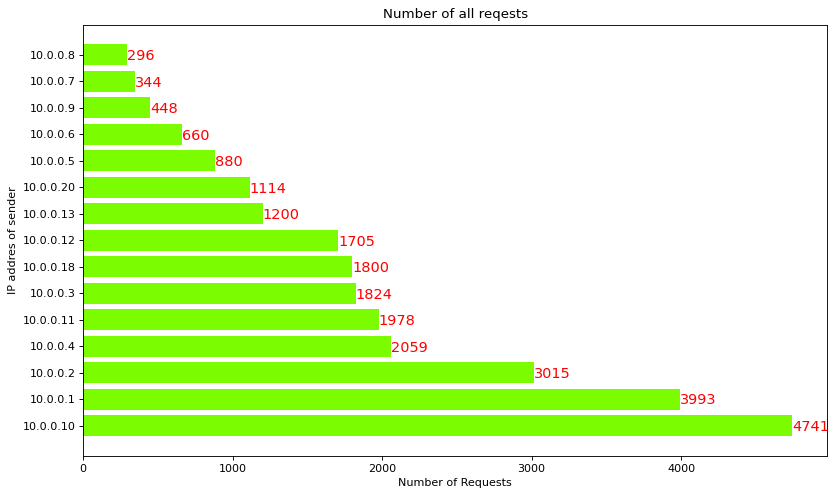

In [13]:
#Let's look at Object columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

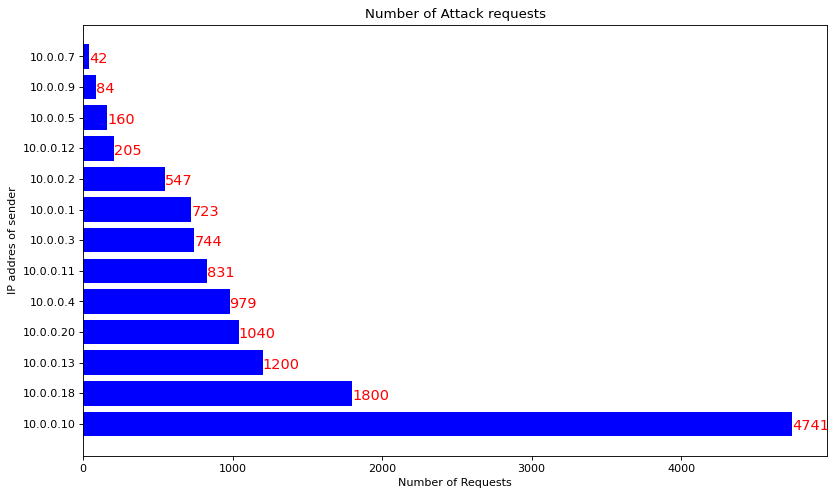

In [14]:

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

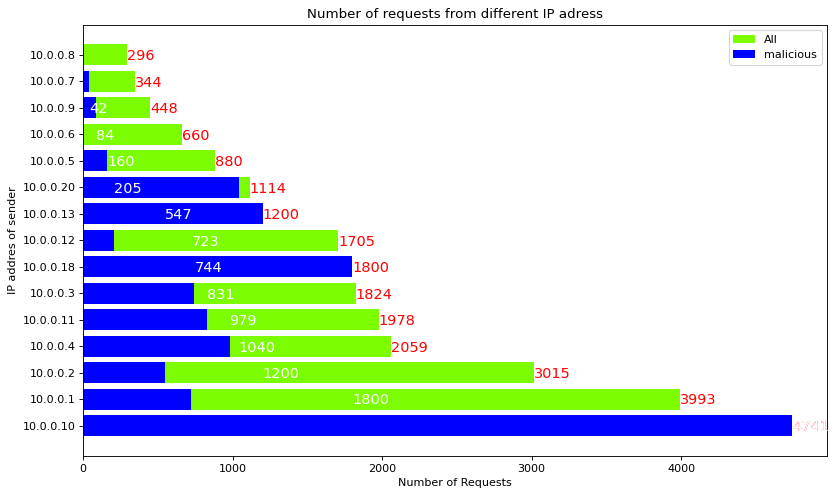

In [15]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')